# Data Analysis of House Sales Prices and Venues in Prague with Python

***

## A. Introduction/Business Problem

Prague is one of the most popular city in Europe with many outstanding views and historic, exciting structures. My journey of Prague has started with the hiring of my wife by a global company there. In this study, **I give a brief insight about the population, house prices and types and its relation with venues by comparing and clustering different municipal parts of the city for anyone looking for buying a property in Prague or interested in real estate industry.**

***

## B. Data Prepareation & Description

The data is used in this project can be divided into three categories.

-Population by Municipal Parts: I took the table from https://www.citypopulation.de/en/czechrep/praguecity/ as csv.

-House sales price: I scrape all available advertisements for Prague in SReality.com which is one the most used webpage for property sale. (around 4700 objects)

-Available venues around the center of the munical part: I used Google Places API for getting the data.

First I'll do explaratory data analysis with population and house price data. Then, I will search for a correlation between price and properties of the house (location,type,size). Finally, I look for the venues in mucipal parts of Prague to understand venues in the municipality effects the price of the house.

### B1. Population by Municipal Parts

Here is the population data for 57 Municipal Parts of Prague.
- Resource:https://www.citypopulation.de/en/czechrep/praguecity/

In [5]:
#Import libraries
import pandas as pd
import numpy as np

In [6]:
df_pra_pop = pd.read_csv("Prague_population.csv")
df_pra_pop.head(5)

Districts  Population
0   Praha 1       29563
1   Praha 2       50363
2   Praha 3       76041
3   Praha 4      132068
4   Praha 5       88225

### B2.House sales price

**Sreality.com** is one of the most used advirtisement webpage for house sale. I scraped the data by using **chromedriver**, and renamed and dropped some of the columns. This part took high amounth time. At the end I have the data frame below. If you want to look how I scraped the data from the page you may look Scraping.ipynb.

-Resource: https://www.sreality.cz/

- **Title**: Advertisement title
- **Type**: Type of the house: 1+kk,2+1,etc.(I'll explain the meanin of kk further)
- **Area**: Area of the house in m2
- **Latitude**: The latitude of the house location
- **Longititude**: The longititude of house location
- **Coodinates**: Combined latitude and longitude
- **Price(CZK)**: Price of the house in CZK

Here I would like to decribe _**type of the houses**_ in Czech Republic. The naming could be different than other countries.

- 1+1:   one room and one seperated kitchen
- 1+kk:  one room and the kitchen is inside room
- 2+1:   two rooms and one seperated kitchen
- 2+kk:  two rooms and the kitchen is inside one of the room

In [7]:
df=pd.read_csv('prague_house_prices_v1.csv')
df.head()

Title  Type  Area Latitude  \
0  Byt 1+kk 43 m² k prodeji Hugo Haase, Praha 5 -...  1+kk    43  50.0290   
1  Byt 3+kk 75 m² k prodeji Na Veselí, Praha 4 - ...  3+kk    75  50.0560   
2  Byt 2+1 71 m² k prodeji Rooseveltova, Praha 6 ...   2+1    71  50.1036   
3  Byt 1+kk 27 m² k prodeji Střešovická, Praha 6 ...  1+kk    27  50.0930   
4  Byt 4+kk 100 m² k prodeji 5. května, Praha 4 -...  4+kk   100  50.0610   

  Longitude         Coordinates  Price(CZK)  
0   14.3622   (50.029, 14.3623)     4274096  
1   14.4414   (50.056, 14.4414)     7990000  
2   14.3994  (50.1036, 14.3995)     8900000  
3   14.3773  (50.0931, 14.3773)     3299000  
4   14.4318   (50.061, 14.4318)     9490000

### B3. Venues around the ceter of municipal parts

By using Google Places api, the venues around the center of the municipal parts are searched and a data frame is created. 

Unfortunately, Google Places Api show maximum 20 results for each query, because of this I need to pick differiantive types of venue to compare municipal parts. Thoose are

- Supermarket: to undersand ease of access food and stuff
- Museum: to undertstand it is a popular place or not
- Bus staion and subway: to undersand the transportation quality
- Pharmacy: to undestand the level of easiness to access drugs



In [8]:
import googlemaps

In [9]:
api_key="AIzaSyBEHiyVUdHe-PyWhwxrcv5qM1S*****"
gmaps=googlemaps.Client(key=api_key)

#### Prague Municipal Parts' Center Location

In [10]:
praha_1="50.0875449,14.4191431"
praha_2="50.074591,14.4349163"
praha_3="50.0871621,14.4532901"
praha_4="50.0428424,14.4375385"
praha_5="50.0647867,14.3824679"
praha_6="50.1001281,14.391996"
praha_7="50.1020422,14.4311513"
praha_8="50.1174552,14.4649591"
praha_9="50.110879,14.5012307"
praha_10="50.0714081,14.4846491"

In [11]:
municipals=["Praha 1","Praha 2","Praha 3","Praha 4","Praha 5","Praha 6","Praha 7","Praha 8","Praha 9","Praha 10"]
df_m=pd.DataFrame(municipals, columns=['Region'])

In [12]:
for i in range(1,11) :
    globals()['pr_s%s' % i]=gmaps.places_nearby(location=globals()['praha_%s' % i], radius=1000, type='supermarket')
    globals()['pr_bs%s' % i]=gmaps.places_nearby(location=globals()['praha_%s' % i], radius=1000, type='bus_station')
    globals()['pr_m%s' % i]=gmaps.places_nearby(location=globals()['praha_%s' % i], radius=1000, type='museum')
    globals()['pr_ss%s' % i]=gmaps.places_nearby(location=globals()['praha_%s' % i], radius=1000, type='subway_station')
    globals()['pr_ph%s' % i]=gmaps.places_nearby(location=globals()['praha_%s' % i], radius=1000, type='pharmacy')

In [13]:
list_supermarket=[]
list_bus_station=[]
list_museum=[]
list_subway_station=[]
list_pharmacy=[]
for k in range(1,11) :
    list_supermarket.append(len(globals()['pr_s%s' % k]['results']))
    list_bus_station.append(len(globals()['pr_bs%s' % k]['results']))
    list_museum.append(len(globals()['pr_m%s' % k]['results']))
    list_subway_station.append(len(globals()['pr_ss%s' % k]['results']))
    list_pharmacy.append(len(globals()['pr_ph%s' % k]['results']))

In [14]:
df_m['supermarket']=pd.DataFrame(list_supermarket)
df_m['bus_station']=pd.DataFrame(list_bus_station)
df_m['museum']=pd.DataFrame(list_museum)
df_m['subway_station']=pd.DataFrame(list_subway_station)
df_m['pharmacy']=pd.DataFrame(list_pharmacy)
df_m

Region  supermarket  bus_station  museum  subway_station  pharmacy
0   Praha 1           20            4      20               5        20
1   Praha 2           20            4      20               4        17
2   Praha 3           12            2      20               1        14
3   Praha 4           10            0       0               2        12
4   Praha 5            3           12       2               1         2
5   Praha 6            6            0       6               2         8
6   Praha 7            7            0      20               1         9
7   Praha 8            1            0       3               0         6
8   Praha 9            7            4       2               4         7
9  Praha 10            9            0       3               1        17

---

## C.Methodology

In this section, I'll go through the steps below.

- Observe the municipal parts of Prague
- Population distribution by municipal parts
- House prices by municipal parts
- Number of different types of venues inside 1km radius of the center of municipal parts
- Cluster municipal parts of Prague

#### Plain Prague Map

In [15]:
#import libs
import wget
import folium

In [16]:
#json
prague_regions_map = r'TMMESTSKECASTI_P1.json' # geojson file

# create a plain Prague map
prague_regions = folium.Map(location=[50.06, 14.45], zoom_start=11)
prague_regions

#### Prague Municipal Parts
You can scroll around map to observe municipal parts.

In [17]:
#dumy data for region gif
df_pop_new=df_pra_pop

In [18]:
df_pop_new['Population'] =5

In [19]:
# create a plain world map
communities_map = folium.Map(location=[50.06, 14.45], zoom_start=11, tiles='stamenwatercolor')

# generate choropleth map 
choropleth = folium.Choropleth(
    geo_data=prague_regions_map,
    data=df_pop_new,
    columns=['Districts', 'Population'],
    key_on='feature.properties.NAZEV_1',
    fill_color='YlOrBr', 
    fill_opacity=1, 
    line_opacity=1,
    highlight=True,
    smooth_factor=0).add_to(communities_map)

# add labels indicating the name of the community
style_function = "font-size: 15px; font-weight: bold"
choropleth.geojson.add_child(
    folium.features.GeoJsonTooltip(['NAZEV_1'], style=style_function, labels=False))


communities_map.save('map_for_gif.html')

# display map
communities_map

#### Population by Municipal Part

In [20]:
#retrieve data
df_pra_pop = pd.read_csv("Prague_population.csv")

prague_regions_map = r'TMMESTSKECASTI_P1.json'

# let Folium determine the scale.
prague_regions = folium.Map(location=[50.06, 14.45], zoom_start=11)
prague_regions.choropleth(
    geo_data=prague_regions_map,
    data=df_pra_pop,
    columns=['Districts', 'Population'],
    key_on='feature.properties.NAZEV_1',
    fill_opacity=0.8, 
    line_opacity=0.5,
    legend_name='Population in Prague',
    highlight=True,
    reset=True)


prague_regions

c:\users\taner\appdata\local\programs\python\python38\lib\site-packages\folium\folium.py:411: FutureWarning: The choropleth  method has been deprecated. Instead use the new Choropleth class, which has the same arguments. See the example notebook 'GeoJSON_and_choropleth' for how to do this.
  warnings.warn(


##### There are more people living in Praha 4 and 10 than others municipal regions.

### C.2.House Sale Prices

#### Retrieve the House Sale Prices data.

In [21]:
df=pd.read_csv('prague_house_prices_v1.csv')

In [22]:
df.head()

Title  Type  Area Latitude  \
0  Byt 1+kk 43 m² k prodeji Hugo Haase, Praha 5 -...  1+kk    43  50.0290   
1  Byt 3+kk 75 m² k prodeji Na Veselí, Praha 4 - ...  3+kk    75  50.0560   
2  Byt 2+1 71 m² k prodeji Rooseveltova, Praha 6 ...   2+1    71  50.1036   
3  Byt 1+kk 27 m² k prodeji Střešovická, Praha 6 ...  1+kk    27  50.0930   
4  Byt 4+kk 100 m² k prodeji 5. května, Praha 4 -...  4+kk   100  50.0610   

  Longitude         Coordinates  Price(CZK)  
0   14.3622   (50.029, 14.3623)     4274096  
1   14.4414   (50.056, 14.4414)     7990000  
2   14.3994  (50.1036, 14.3995)     8900000  
3   14.3773  (50.0931, 14.3773)     3299000  
4   14.4318   (50.061, 14.4318)     9490000

#### Observe the house types.

In [23]:
df['Type'].value_counts()

2+kk        1212
3+kk         984
1+kk         625
3+1          444
4+kk         434
2+1          271
4+1          136
5+kk         104
1+1           93
atypicky      35
5+1           31
6-a-vice      21
Name: Type, dtype: int64

#### Make latitude and longitude numeric

In [24]:
df['Latitude'] = pd.to_numeric(df['Latitude'],errors='coerce')
df['Longitude'] = pd.to_numeric(df['Longitude'],errors='coerce')

In [25]:
df.dtypes

Title           object
Type            object
Area             int64
Latitude       float64
Longitude      float64
Coordinates     object
Price(CZK)       int64
dtype: object

#### Check number of objects (advertisement)

In [26]:
df.head(20)
df.shape

(4390, 7)

#### Check NaN values

In [27]:
df['Latitude'].isnull().sum()

4

In [28]:
df['Longitude'].isnull().sum()

2

In [29]:
#find missing values
df[df.isnull().any(axis=1)]

Title  Type  Area  Latitude  \
567   Byt 1+kk 32 m² k prodeji Františka Jansy, Prah...  1+kk    32       NaN   
1917  Byt 2+kk 101 m² k prodeji Na Ořechovce, Praha ...  2+kk   101   50.0953   
2077  Byt 3+kk 93 m² k prodeji Františka Jansy, Prah...  3+kk    93       NaN   
2434  Byt 3+kk 101 m² k prodeji Na Ořechovce, Praha ...  3+kk   101   50.0953   
2480  Byt 1+kk 27 m² k prodeji Bajkonurská, Praha 4 ...  1+kk    27       NaN   
3669  Byt 1+kk 30 m² k prodeji Jurkovičova, Praha 4 ...  1+kk    30       NaN   

      Longitude        Coordinates  Price(CZK)  
567     14.5527  (50.065, 14.5527)     1199000  
1917        NaN  (50.0953, 14.381)    11990000  
2077    14.5527  (50.065, 14.5527)     2850000  
2434        NaN  (50.0953, 14.381)    11990000  
2480    14.5286   (50.03, 14.5286)     2690000  
3669    14.5296  (50.027, 14.5296)     3350000

#### Correct NaN values

In [30]:
#Correct values
df.iloc[567,3] = 50.065
df.iloc[1917,4] = 14.381
df.iloc[2077,3] = 50.065
df.iloc[2434,4] = 14.381
df.iloc[2480,3] = 50.03
df.iloc[3669,3] = 50.027

In [31]:
#find missing values
df[df.isnull().any(axis=1)]

Empty DataFrame
Columns: [Title, Type, Area, Latitude, Longitude, Coordinates, Price(CZK)]
Index: []

#### Add region column to the dataframe by using json file

In [32]:
#!pip install shapely
import shapely
import geojson

In [33]:
import json
from shapely.geometry import shape, GeometryCollection, Point
region_list=[]

with open('TMMESTSKECASTI_P1.json', 'r') as f:
    js = json.load(f)

for i in range(0,4390):
    x= df['Longitude']
    y= df['Latitude']
    x=x.iloc[i]
    y=y.iloc[i]
    point = Point(x, y)
    for feature in js['features']:
        polygon = shape(feature['geometry'])
        if polygon.contains(point):
            region_list.append(str(feature['properties']['NAZEV_1']))

In [34]:
df_region=pd.DataFrame(region_list)

In [35]:
df_region.shape

(4390, 1)

In [36]:
df['Region'] =df_region

#### Now we have Region column

In [37]:
df.head()

Title  Type  Area  Latitude  \
0  Byt 1+kk 43 m² k prodeji Hugo Haase, Praha 5 -...  1+kk    43   50.0290   
1  Byt 3+kk 75 m² k prodeji Na Veselí, Praha 4 - ...  3+kk    75   50.0560   
2  Byt 2+1 71 m² k prodeji Rooseveltova, Praha 6 ...   2+1    71   50.1036   
3  Byt 1+kk 27 m² k prodeji Střešovická, Praha 6 ...  1+kk    27   50.0930   
4  Byt 4+kk 100 m² k prodeji 5. května, Praha 4 -...  4+kk   100   50.0610   

   Longitude         Coordinates  Price(CZK)   Region  
0    14.3622   (50.029, 14.3623)     4274096  Praha 5  
1    14.4414   (50.056, 14.4414)     7990000  Praha 4  
2    14.3994  (50.1036, 14.3995)     8900000  Praha 6  
3    14.3773  (50.0931, 14.3773)     3299000  Praha 6  
4    14.4318   (50.061, 14.4318)     9490000  Praha 4

In [38]:
df.tail()

Title  Type  Area  Latitude  \
4385  Byt 2+kk 58 m² k prodeji Tlumačovská, Praha 5 ...  2+kk    58   50.0399   
4386  Byt 4+kk 126 m² k prodeji Praha 5; 9 989 000 K...  4+kk   126   50.0835   
4387  Byt 1+kk 35 m² k prodeji Olšanská, Praha 3 - Ž...  1+kk    35   50.0833   
4388  Byt 4+kk 140 m² k prodeji Na pomezí, Praha 5 -...  4+kk   140   50.0614   
4389  Byt 1+kk 39 m² k prodeji Grafická, Praha 5 - S...  1+kk    39   50.0730   

      Longitude         Coordinates  Price(CZK)    Region  
4385    14.3357  (50.0399, 14.3358)     5850000  Praha 13  
4386    14.4341  (50.0835, 14.4341)     9989000   Praha 1  
4387    14.4662  (50.0834, 14.4662)     4290000   Praha 3  
4388    14.3663  (50.0615, 14.3663)    21679000   Praha 5  
4389    14.3945  (50.0731, 14.3945)     5990000   Praha 5

#### Drop Title column

In [39]:
df.drop(['Title'], axis=1, inplace=True)

In [40]:
df.head()

Type  Area  Latitude  Longitude         Coordinates  Price(CZK)   Region
0  1+kk    43   50.0290    14.3622   (50.029, 14.3623)     4274096  Praha 5
1  3+kk    75   50.0560    14.4414   (50.056, 14.4414)     7990000  Praha 4
2   2+1    71   50.1036    14.3994  (50.1036, 14.3995)     8900000  Praha 6
3  1+kk    27   50.0930    14.3773  (50.0931, 14.3773)     3299000  Praha 6
4  4+kk   100   50.0610    14.4318   (50.061, 14.4318)     9490000  Praha 4

#### Export clean data

In [41]:
#export 
df.to_csv('Prague_houses.csv', index=False)

#### Exclude the municipal parts having advertisements less than  30

In [42]:
#exclude the regions have objects less than 30
s = df['Region'].value_counts()
df_new = df[df.isin(s.index[s >= 30]).values]

In [43]:
#Average price by region
df_grouped=df_new.groupby('Region').mean()
df_grouped_price=df_grouped[['Price(CZK)']]
df_grouped_area=df_grouped[['Area']]


In [44]:
#sort
df_grouped_price.sort_values(['Price(CZK)'], ascending=False, axis=0, inplace=True)
df_grouped_area.sort_values(['Area'], ascending=False, axis=0, inplace=True)
#get the top 7 entries
df_price_top6 = df_grouped_price.head(10)
df_area_top6 = df_grouped_area.head(10)

<ipython-input-44-98328eb9d8a8>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_grouped_price.sort_values(['Price(CZK)'], ascending=False, axis=0, inplace=True)
<ipython-input-44-98328eb9d8a8>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_grouped_area.sort_values(['Area'], ascending=False, axis=0, inplace=True)


In [45]:
# use the inline backend to generate the plots within the browser
%matplotlib inline 

import matplotlib as mpl
import matplotlib.pyplot as plt

mpl.style.use('ggplot') # optional: for ggplot-like style

# check for latest version of Matplotlib
print ('Matplotlib version: ', mpl.__version__) # >= 2.0.0

Matplotlib version:  3.3.2


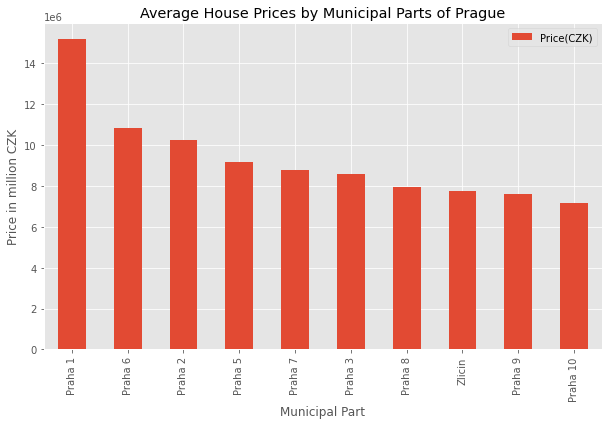

In [48]:
# step 2: plot data
df_price_top6.plot(kind='bar', figsize=(10, 6))

plt.xlabel('Municipal Part') # add to x-label to the plot
plt.ylabel("Price in million CZK") # add y-label to the plot
plt.title('Average House Prices by Municipal Parts of Prague') # add title to the plot

#Axes.ticklabel_format(self, *, axis='both', style='', scilimits=None, useOffset=None, useLocale=None, useMathText=None)
plt.ticklabel_format(scilimits=(6,6), axis='y')

plt.show()

#### Average price for an house in Praha 1 and 6 are higher than others.

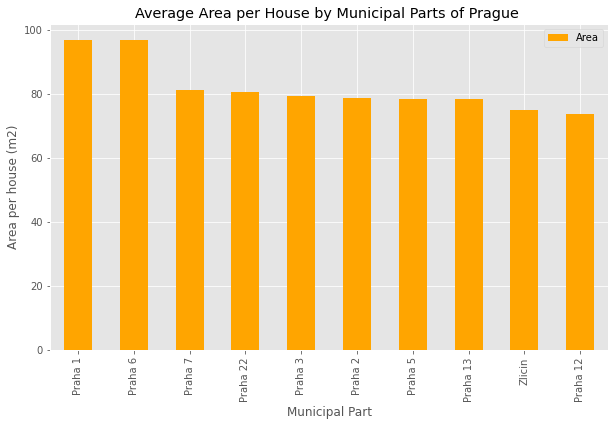

In [49]:
# step 2: plot data
df_area_top6.plot(kind='bar', figsize=(10, 6), color='orange')

plt.xlabel('Municipal Part') # add to x-label to the plot
plt.ylabel("Area per house (m2)") # add y-label to the plot
plt.title('Average Area per House by Municipal Parts of Prague ') # add title to the plot

plt.show()

#### The houses in Praha 1 and Praha 6 are larger than others.

In [51]:
df_m2p=df_grouped_price['Price(CZK)']/df_grouped_area['Area']
df_m3p=df_m2p[['Praha 1','Praha 2','Praha 3','Praha 4','Praha 5','Praha 6','Praha 7','Praha 8','Praha 9','Praha 10']]
df_m3p.sort_values(ascending=False, inplace=True)

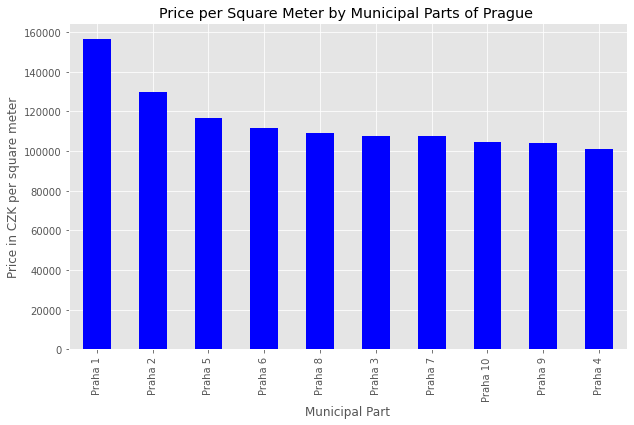

In [52]:

df_m3p.plot(kind='bar', figsize=(10, 6), color='blue')

plt.xlabel('Municipal Part') # add to x-label to the plot
plt.ylabel("Price in CZK per square meter") # add y-label to the plot
plt.title('Price per Square Meter by Municipal Parts of Prague ') # add title to the plot

plt.show()

#### This is one the most popular metric to evaluate the value of a house.
#### The price per square meter is high for Praha 1 and 2, compared to others.
#### Praha 6 is not the first ranks for the price per square meter, however it was in the first ranks for the average price for a house, it seems that the reason of this, the size of the houses in Praha 6 is larger.

In [53]:
df_grouped_type=df.groupby('Type').count()
df_type=df_grouped_type[['Area']]
df_type.rename(columns={'Area' : 'Count'}, inplace=True)

c:\users\taner\appdata\local\programs\python\python38\lib\site-packages\pandas\core\frame.py:4300: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().rename(


In [54]:
df_type.sort_values(['Count'], ascending=False, axis=0, inplace=True)
df_type=df_type.head(5)

<ipython-input-54-76b43bdfd13d>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_type.sort_values(['Count'], ascending=False, axis=0, inplace=True)


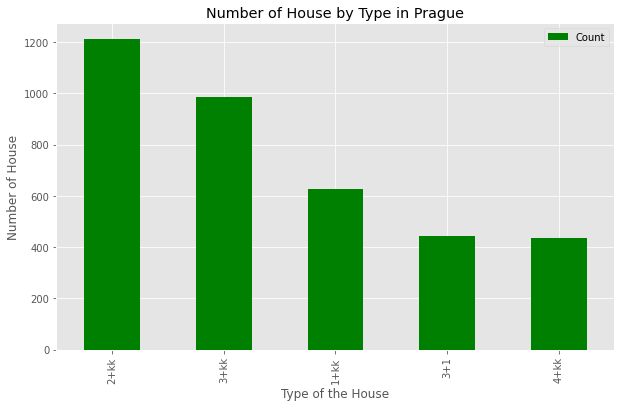

In [55]:
# step 2: plot data
df_type.plot(kind='bar', figsize=(10, 6), color='green')

plt.xlabel('Type of the House') # add to x-label to the plot
plt.ylabel("Number of House") # add y-label to the plot
plt.title('Number of House by Type in Prague') # add title to the plot

plt.show()

#### 2+kk is most prevelant house type in Prague

#### Create a data frame for most expensive 20 houses in Prague

In [56]:
df_incidents = df.sort_values(['Price(CZK)'], ascending=False, axis=0, inplace=False).head(20)
df_incidents

Type  Area  Latitude  Longitude         Coordinates  Price(CZK)  \
290       5+kk   235   50.0816    14.4137  (50.0817, 14.4138)    79000000   
27        5+kk   235   50.0833    14.4139  (50.0833, 14.4139)    79000000   
3358      5+kk   235   50.0816    14.4137  (50.0817, 14.4138)    79000000   
1142  atypicky   445   50.0865    14.4323  (50.0866, 14.4323)    59870000   
3398      4+kk   255   50.0903    14.4216  (50.0904, 14.4217)    54450000   
358       4+kk   229   50.0845    14.4177  (50.0846, 14.4178)    50000000   
3270      5+kk   302   50.0614    14.3663  (50.0615, 14.3663)    49849000   
2889      4+kk   169   50.0891    14.4183  (50.0892, 14.4184)    49000000   
1769  6-a-vice   243   50.0730    14.3889   (50.0731, 14.389)    45990000   
942       4+kk   315   50.0845    14.4177  (50.0846, 14.4178)    45000000   
1969      4+kk   256   50.0845    14.4177  (50.0846, 14.4178)    45000000   
1068  6-a-vice   318   50.0092    14.3858  (50.0093, 14.3858)    42025000   
591        3+1   329   50.0865    14.4323  (50.0866, 14.4323)    41928000   
974       4+kk   329   50.0865    14.4323  (50.0866, 14.4323)    41928000   
3483  atypicky   388   50.0828    14.3764  (50.0828, 14.3765)    39900000   
2605  6-a-vice   241   50.0735    14.4629   (50.0735, 14.463)    39890000   
2877       3+1   135   50.0878    14.4153  (50.0878, 14.4153)    38000000   
1750       4+1   226   50.0981    14.4706  (50.0981, 14.4707)    37990000   
4139      5+kk   209   50.0770    14.3876  (50.0771, 14.3877)    37550000   
1967      4+kk   211   50.0795    14.4139   (50.0795, 14.414)    37030007   

             Region  
290         Praha 1  
27          Praha 1  
3358        Praha 1  
1142        Praha 1  
3398        Praha 1  
358         Praha 1  
3270        Praha 5  
2889        Praha 1  
1769        Praha 5  
942         Praha 1  
1969        Praha 1  
1068  Velka Chuchle  
591         Praha 1  
974         Praha 1  
3483        Praha 6  
2605       Praha 10  
2877        Praha 1  
1750        Praha 8  
4139        Praha 5  
1967        Praha 1

In [57]:
prague_regions_v2 = folium.Map(location=[50.06, 14.45], zoom_start=11)

prague_regions_v2.choropleth(
    geo_data=prague_regions_map,
    key_on='feature.properties.NAZEV_1',
    fill_opacity=0.2, 
    line_opacity=0.5,
    highlight=True,
    fill_color='yellow',
    legend_name=None,
    reset=True)


incidents = folium.map.FeatureGroup()

# loop through the 100 crimes and add each to the incidents feature group
for lat, lng, in zip(df_incidents.Latitude, df_incidents.Longitude):
    incidents.add_child(
        folium.CircleMarker(
            [lat, lng],
            radius=2, # define how big you want the circle markers to be
            color='red',
            fill=True,
            fill_color=None,
            fill_opacity=0.3
        )
    )

# add incidents to map
prague_regions_v2.add_child(incidents)

c:\users\taner\appdata\local\programs\python\python38\lib\site-packages\folium\folium.py:411: FutureWarning: The choropleth  method has been deprecated. Instead use the new Choropleth class, which has the same arguments. See the example notebook 'GeoJSON_and_choropleth' for how to do this.
  warnings.warn(


#### The most expensive houses are mainly located in Praha 1.

## C.3. Cluster Municipal Parts

In this section, I will cluster municipal parts based on the number of venues in different catogerios around the center of the municipal parts. The data is decribed in the section B.3

In [58]:
df_m

Region  supermarket  bus_station  museum  subway_station  pharmacy
0   Praha 1           20            4      20               5        20
1   Praha 2           20            4      20               4        17
2   Praha 3           12            2      20               1        14
3   Praha 4           10            0       0               2        12
4   Praha 5            3           12       2               1         2
5   Praha 6            6            0       6               2         8
6   Praha 7            7            0      20               1         9
7   Praha 8            1            0       3               0         6
8   Praha 9            7            4       2               4         7
9  Praha 10            9            0       3               1        17

### Normalizing the data for k-means clustering

In [59]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
df_m[['supermarket', 'bus_station','museum', 'subway_station','pharmacy']] = scaler.fit_transform(df_m[['supermarket', 'bus_station','museum', 'subway_station','pharmacy']].to_numpy())
df_m

Region  supermarket  bus_station    museum  subway_station  pharmacy
0   Praha 1     1.734412     0.390702  1.208649        1.837800  1.613118
1   Praha 2     1.734412     0.390702  1.208649        1.204076  1.063192
2   Praha 3     0.412955    -0.167444  1.208649       -0.697097  0.513265
3   Praha 4     0.082591    -0.725589 -1.115676       -0.063372  0.146647
4   Praha 5    -1.073684     2.623284 -0.883243       -0.697097 -1.686442
5   Praha 6    -0.578137    -0.725589 -0.418378       -0.063372 -0.586588
6   Praha 7    -0.412955    -0.725589  1.208649       -0.697097 -0.403280
7   Praha 8    -1.404048    -0.725589 -0.767027       -1.330821 -0.953206
8   Praha 9    -0.412955     0.390702 -0.883243        1.204076 -0.769897
9  Praha 10    -0.082591    -0.725589 -0.767027       -0.697097  1.063192

In [60]:
from sklearn.cluster import KMeans

In [61]:
# set number of clusters
kclusters = 3

df_m_clustering = df_m.drop('Region', 1)

# run k-means clustering
kmeans = KMeans(n_clusters=kclusters, random_state=0).fit(df_m_clustering)

# check cluster labels generated for each row in the dataframe
array_1=kmeans.labels_[0:10] 

print(array_1)

[1 1 0 0 2 0 0 0 0 0]


In [62]:
df_m['Cluster']=array_1
df_clu=df_m[['Region','Cluster']]
df_clu

Region  Cluster
0   Praha 1        1
1   Praha 2        1
2   Praha 3        0
3   Praha 4        0
4   Praha 5        2
5   Praha 6        0
6   Praha 7        0
7   Praha 8        0
8   Praha 9        0
9  Praha 10        0

| **Muicipal Parts**         | **Cluester**  |
| ------------------------   |:-------------:|
| Praha 1 & 2                | Cluster 1     |
| Praha 5                    | Cluster 2     |
| Praha 3,4,6,7,8,9,10       | Cluster 3     |

- It seems that Praha 1 & 2 have many venues around the center so these two are distinctive than others.
- Praha 5 can be separated because it comes forward with bus station availability.
- Other regions have similar features.

---

## D.4.Results and Discussion

Let's look out our findings.

- There are more people living in Praha 4 and 10 than others municipal regions.
- Average price for an house in Praha 1 and 6 are higher than others.
- The houses in Praha 1 and Praha 6 are larger than others.
- The price per square meter is high for Praha 1 and 2, compared to others.
- Praha 6 is not in the first ranks for the price per square meter, however it was in the first ranks for the average price for a house, it seems that the reason of this, the size of the houses in Praha 6 is larger.
- 2+kk is most prevelant house type in Prague.
- The most expensive houses are mainly located in Praha 1.
-Based on the venues available, Prague municipal parts can be divided in three clusters.

#### Do the venues around municipal parts contribute the price of the house?

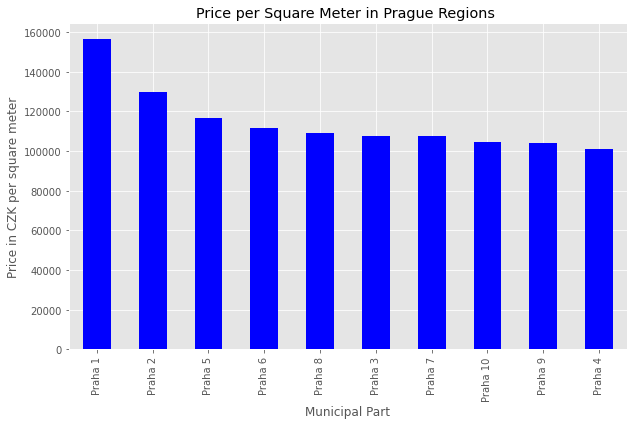

In [63]:

df_m3p.plot(kind='bar', figsize=(10, 6), color='blue')

plt.xlabel('Municipal Part') # add to x-label to the plot
plt.ylabel("Price in CZK per square meter") # add y-label to the plot
plt.title('Price per Square Meter in Prague Regions ') # add title to the plot

plt.show()

| **Muicipal Parts**         | **Cluester**  |
| ------------------------   |:-------------:|
| Praha 1 & 2                | Cluster 1     |
| Praha 5                    | Cluster 2     |
| Praha 3,4,6,7,8,9,10       | Cluster 3     |

Yes. We may divide the municipal parts to 3 groups based on price per square meter. And this fits the cluster which is created only by the numbers of different types of venues around the municipal parts' center.

---

## E.5.Conclusion

Prague has 57 municipal parts and each of them may have different features. However some of them has more venues around and this contributes the price of the house.